In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 6

In [ ]:
from pathlib import Path
import os
import csv

os.chdir('C:/Users/medco/nyu_cusp_ads_project_explore/CitiBike-Dock-Stations/df_202{}/'.format(m))
files = os.listdir('C:/Users/medco/nyu_cusp_ads_project_explore/CitiBike-Dock-Stations/df_202{}/'.format(m))
    for f in files:
        #print(f)
        name = f
        station = name[8:12]
        try:
            df = pd.read_csv('{}'.format(f))
            vars()['station_df_train'+station] = pd.concat([vars()['station_df_train'+station], df])
        except KeyError:
            continue
    os.chdir('C:/Users/medco/nyu_cusp_ads_project_explore/CitiBike-Dock-Stations/')

In [28]:
names = [
    'C1_2_1','C1_2_2','C1_2_3','C1_2_4','C1_2_5','C1_2_6','C1_2_7',
    'C2_2_1',
    'R1_2_1',
    ''    ]
for i in names:
    vars()['df_'+i] = pd.read_csv('MLC_project_data_'+i+'.csv')
    # vars()['df_'+i]['XCOORD.'] = vars()['df_'+i]['XCOORD.'].astype('int')
    # vars()['df_'+i]['YCOORD.'] = vars()['df_'+i]['YCOORD.'].astype('int')

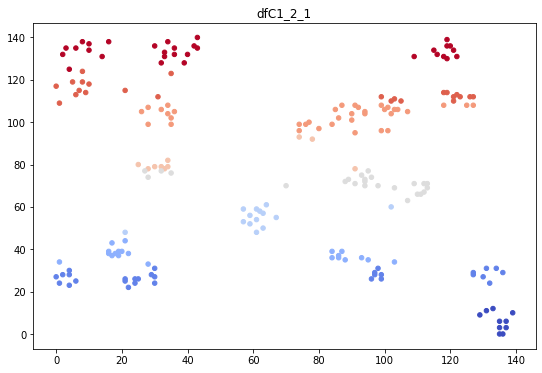

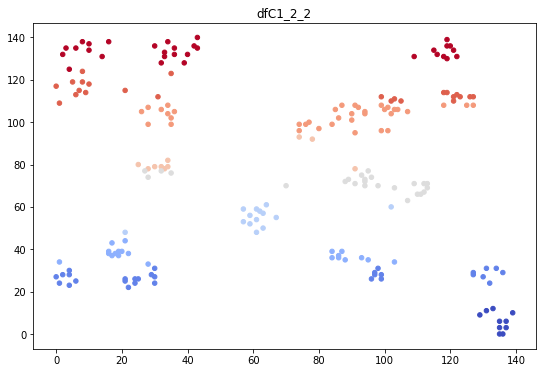

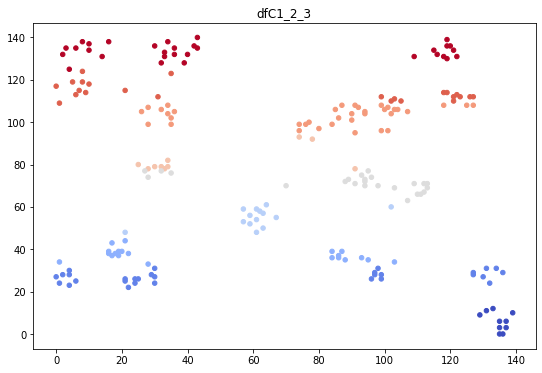

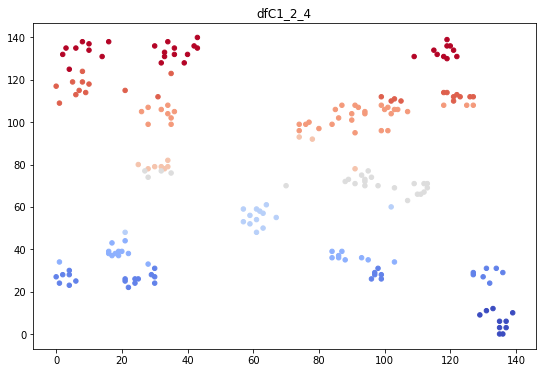

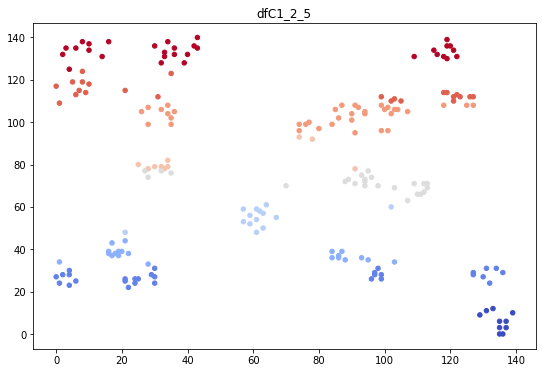

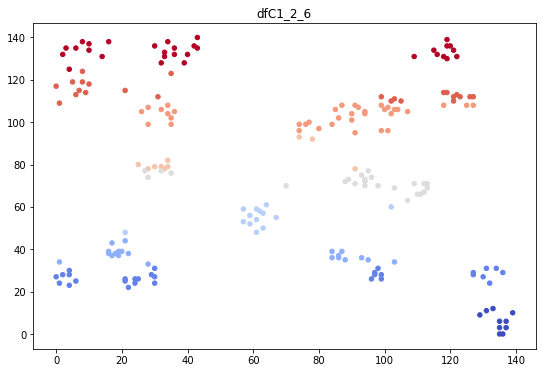

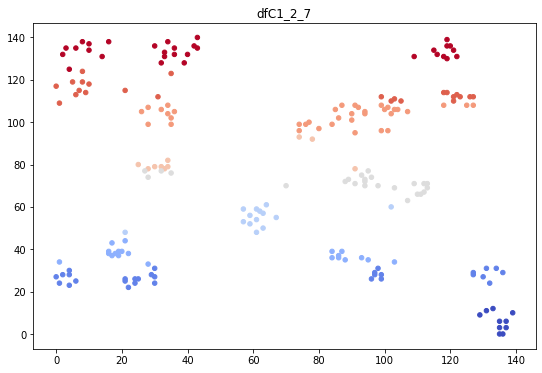

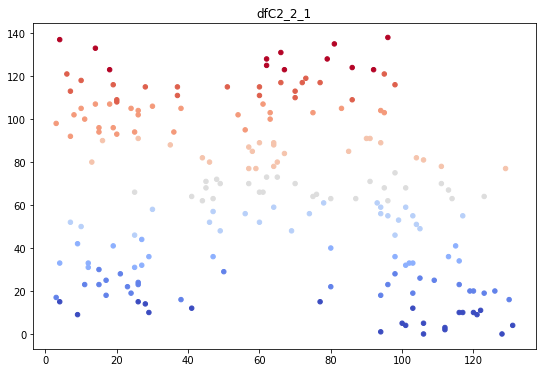

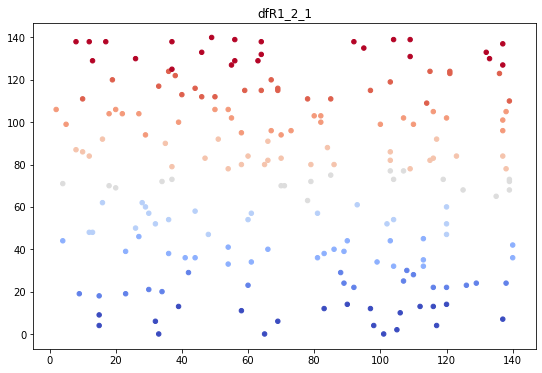

In [29]:
for i in names:
    X=vars()['df_'+i]['XCOORD.']
    Y=vars()['df_'+i]['YCOORD.']
    plt.gca()
    plt.title('df'+i)
    plt.scatter(X,Y, s=20, c=Y, cmap=plt.cm.get_cmap('coolwarm', 9))
    plt.show()